# Enron POI Classifier Optimization

** Loading the data **

In [1]:
import pickle
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

#### Total number of data points:

In [2]:
len(data_dict.keys())

146

#### Features and number of features

In [3]:
all_features = []
c = 0
for key in data_dict:
    if c < 1:
        for feature in data_dict[key]:
            all_features.append(feature)
        c += 1
print "Features: \n{}".format(all_features)
print "Number of features: {}".format(len(all_features))

Features: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
Number of features: 21


## Task 1: Select what features you'll use.
 
features_list is a list of strings, each of which is a feature name. The first feature must be "poi". 

From above list of available features, all were included except for email_address (since it's not expected to be a good contributor to the algorithm and it cannot be converted to a numpy array).

In [4]:
features_list = ['poi']

In [5]:
for feature in all_features:
    if feature != 'poi' and feature != 'email_address':
        features_list.append(feature)

In [6]:
features_list

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person']

In [7]:
len(features_list)

20

## Task 2: Remove outliers

In [8]:
from feature_format import featureFormat, targetFeatureSplit

In [9]:
data = featureFormat(data_dict, features_list)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Plotting a few features

In [11]:
def plotFeatures(data, features_list, feature_x, feature_y):
    """Plots 2 features against each other in a scatter plot.
        data - numpy array that contains the features
        feature_x - feature for x axis
        feature_y - feature that goes in the y-axis
    """
    for point in data:
        x = point[features_list.index(feature_x)]
        y = point[features_list.index(feature_y)]
        if point[0] == 1.0:
            plt.scatter(x, y, color='r', marker='*')
        else:
            plt.scatter(x, y)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

*** salary vs. bonus***

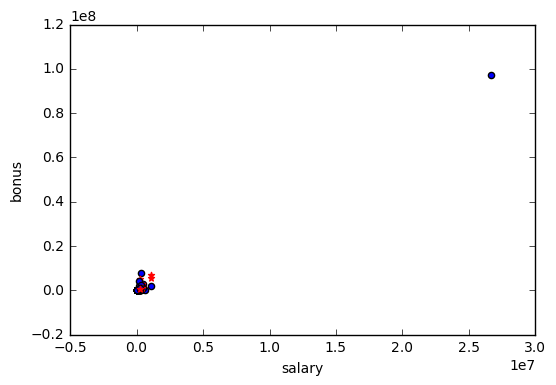

In [12]:
plotFeatures(data, features_list, 'salary', 'bonus')

Lone point in the upper far right is an outlier. Remembering from the outliers mini_project that this is the entry called "TOTAL":

In [13]:
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

Examining all the other remaining keys, one more name that does not look like a person is "THE TRAVEL AGENCY IN THE PARK" so it was also removed:

In [14]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Recreating data using the featureFormat function and replotting salary vs. bonus:

In [15]:
data = featureFormat(data_dict, features_list)

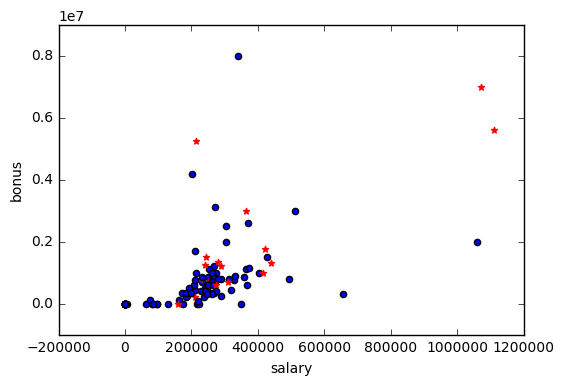

In [16]:
plotFeatures(data, features_list, 'salary', 'bonus')

To explore the data further, we can create scatterplots for other features, though this involves creating 
```
    20!
--------------
2! * (20 - 2)!
```
plots (190). Just plotting a few of them here:

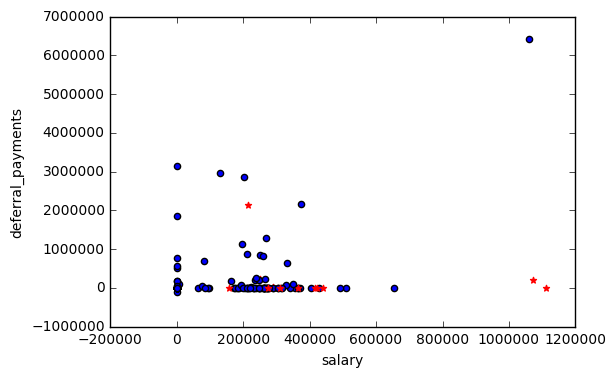

In [17]:
plotFeatures(data, features_list, 'salary', 'deferral_payments')

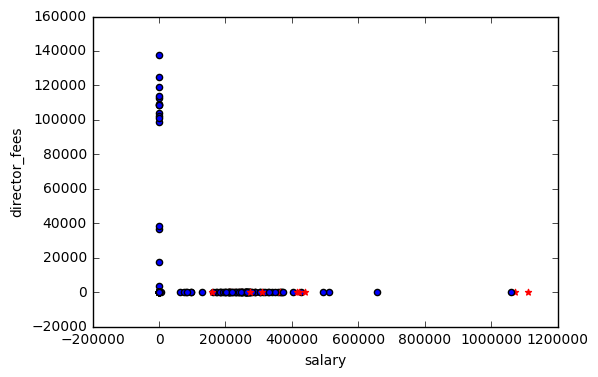

In [18]:
plotFeatures(data, features_list, 'salary', 'director_fees')

## Task 3: Create new feature(s)

As discussed in class, the email features are more appropriately converted to fraction rather than just raw number of emails to and from poi.

In [23]:
def computeFraction(poi_messages, all_messages):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
    """
    if poi_messages != 'NaN' or all_messages != 'NaN':
        fraction = float(poi_messages) / float(all_messages)
    else:
        fraction = 0
    return fraction

In [24]:
for name in data_dict:
    data_point = data_dict[name]
    
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction(from_poi_to_this_person, to_messages)
    
    data_point["fraction_from_poi"] = fraction_from_poi
    
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    
    data_point["fraction_to_poi"] = fraction_to_poi

Checking whether the new features were added:

In [25]:
c = 0
for key in data_dict:
    if c < 1:
        for feature in data_dict[key]:
            print feature
        c += 1

to_messages
deferral_payments
expenses
poi
deferred_income
email_address
long_term_incentive
fraction_from_poi
restricted_stock_deferred
shared_receipt_with_poi
loan_advances
from_messages
other
director_fees
bonus
total_stock_value
from_poi_to_this_person
from_this_person_to_poi
restricted_stock
salary
total_payments
fraction_to_poi
exercised_stock_options


Creation of all_features again:

In [26]:
all_features = []
c = 0
for key in data_dict:
    if c < 1:
        for feature in data_dict[key]:
            all_features.append(feature)
        c += 1

In [27]:
all_features

['to_messages',
 'deferral_payments',
 'expenses',
 'poi',
 'deferred_income',
 'email_address',
 'long_term_incentive',
 'fraction_from_poi',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'from_messages',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'restricted_stock',
 'salary',
 'total_payments',
 'fraction_to_poi',
 'exercised_stock_options']

In [28]:
len(all_features)

23

It is now only appropriate to remove the raw email features, "from_poi_to_this_person", "from_this_person_to_poi", "from_messages" and "to_messages".

In [29]:
features_remove = ["poi", "email_address", "from_poi_to_this_person", "from_this_person_to_poi", "from_messages", "to_messages"]

In [30]:
features_list = ["poi"]
for feature in all_features:
    if feature not in features_remove:
        features_list.append(feature)
print "features_list = {}".format(features_list)

features_list = ['poi', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', 'fraction_from_poi', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'other', 'director_fees', 'bonus', 'total_stock_value', 'restricted_stock', 'salary', 'total_payments', 'fraction_to_poi', 'exercised_stock_options']


In [31]:
len(features_list)

18

Exploring the data again, this time using histograms:

In [32]:
data = featureFormat(data_dict, features_list)

In [33]:
poi = []
non_poi = []
for point in data:
    if point[0]==1.0:
        poi.append(point)
    else:
        non_poi.append(point)

In [34]:
len(poi)

18

In [35]:
len(non_poi)

125

In [36]:
poi = np.array(poi)
non_poi = np.array(non_poi)

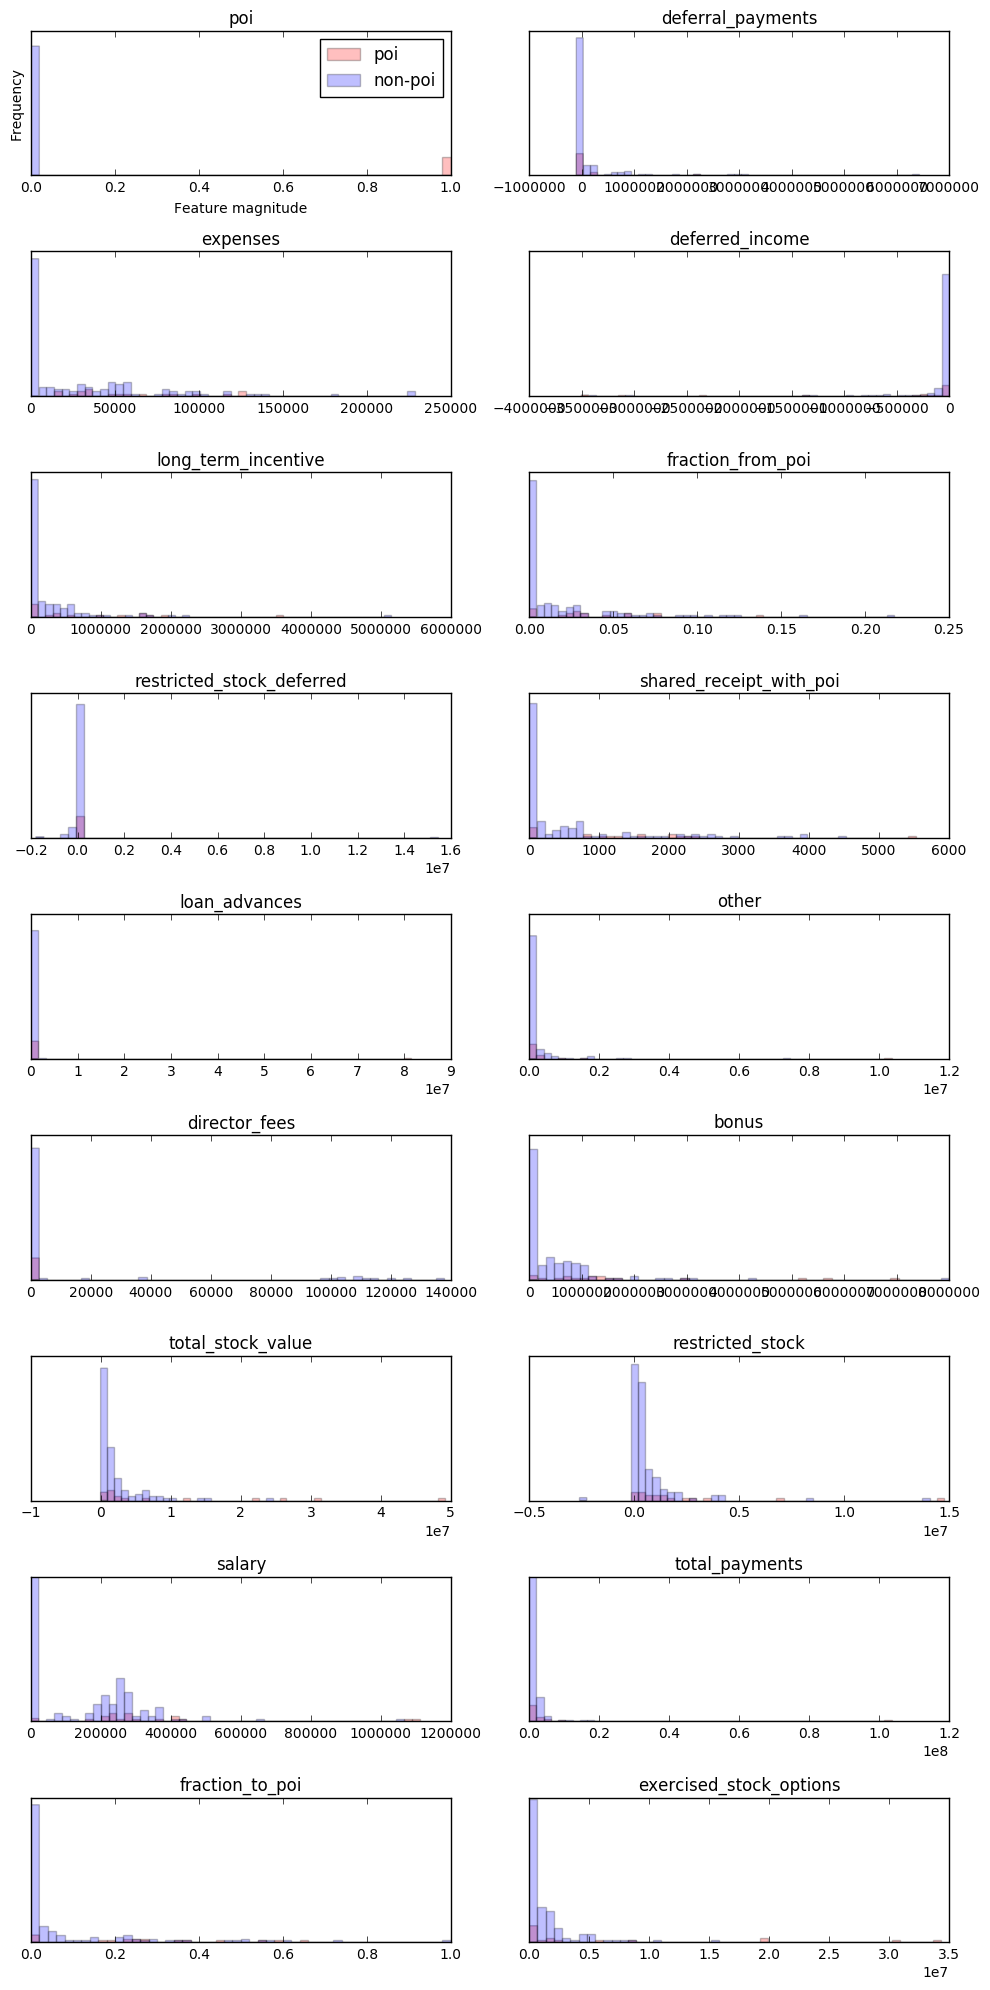

In [37]:
fig, axes = plt.subplots(9, 2, figsize=(10,20))
ax = axes.ravel()
for i, _ in enumerate(features_list):
    _, bins = np.histogram(data[:, i], bins=50)
    ax[i].hist(poi[:, i], bins=bins, color='r', alpha=0.25)
    ax[i].hist(non_poi[:, i], bins=bins, color='b', alpha=0.25)
    ax[i].set_title(features_list[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["poi", "non-poi"], loc="best")
fig.tight_layout()

Replotting above histograms and setting the y-axis limits to 0-10:

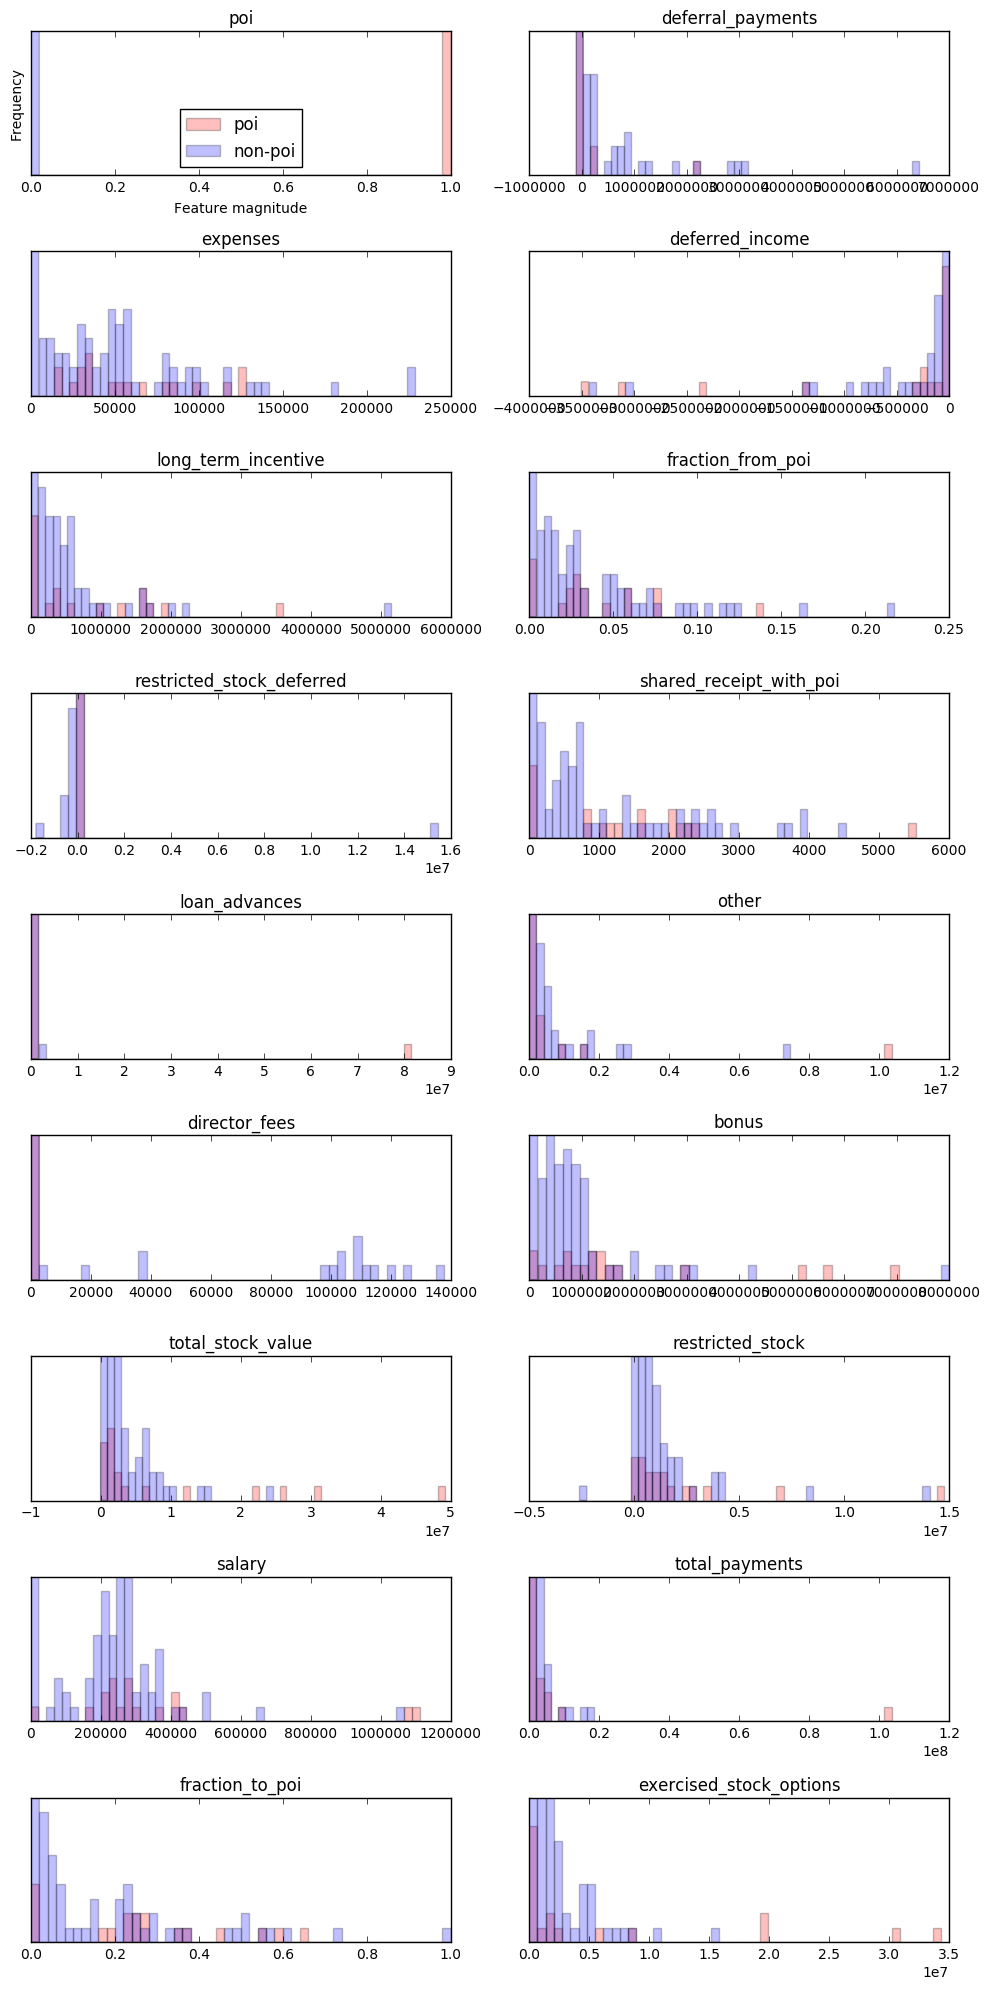

In [38]:
fig, axes = plt.subplots(9, 2, figsize=(10,20))
ax = axes.ravel()
for i, _ in enumerate(features_list):
    _, bins = np.histogram(data[:, i], bins=50)
    ax[i].hist(poi[:, i], bins=bins, color='r', alpha=0.25)
    ax[i].hist(non_poi[:, i], bins=bins, color='b', alpha=0.25)
    ax[i].set_title(features_list[i])
    ax[i].set_ylim([0,10])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["poi", "non-poi"], loc="best")
fig.tight_layout()

From the above histograms, it's not very easy to pick features because the histograms in each feature for non-poi and poi are not totally separated. There's a big overlap between poi and non-poi. However, their distributions are different. Preliminary discarding features will depend on distributions. The potential features to discard are:

- deferral_payments
- restricted_stock_deferred
- director_fees

For the first attempt in optimizing the classifier, I will start by using all the 18 features at this point:

In [101]:
features_list

['poi',
 'deferral_payments',
 'expenses',
 'deferred_income',
 'long_term_incentive',
 'fraction_from_poi',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'restricted_stock',
 'salary',
 'total_payments',
 'fraction_to_poi',
 'exercised_stock_options']

In [102]:
len(features_list)

18

This will be the base feature list:

In [42]:
base_features_list = features_list

#### Store data_dict to my_dataset for easy export

In [43]:
my_dataset = data_dict

#### Extract features and labels from dataset for local testing

In [103]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

## Task 4: Try a variety of classifiers

Please name your classifier clf for easy export below. Note that if you want to do PCA or other multi-stage operations, you'll need to used Pipelines. For more info: http://scikit-learn.org/stable/modules/pipeline.html

```
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
```

### Splitting the features to test and train, converting to numpy arrays

In [104]:
from sklearn import model_selection

In [105]:
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(features, labels, test_size=0.3, random_state=42)

In [106]:
features_train = np.array(features_train)
features_test = np.array(features_test)
labels_train = np.array(labels_train)
labest_test = np.array(labels_train)

### Making a Pipeline

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#### Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), DecisionTreeClassifier(random_state=42))

Pipeline steps:

In [110]:
pipe.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('decisiontreeclassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=42, splitter='best'))]

In [111]:
param_grid = {'pca__n_components': [2,3], 'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [114]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=Non...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'pca__n_components': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [115]:
grid.score(features_test, labels_test)

0.90697674418604646

In [116]:
grid.best_score_

0.85999999999999999

In [117]:
grid.best_params_

{'decisiontreeclassifier__min_samples_split': 18, 'pca__n_components': 3}

In [118]:
grid.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
...lit=18, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])

In [119]:
grid.best_estimator_.named_steps["decisiontreeclassifier"]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=18, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [120]:
grid.best_estimator_.named_steps["pca"]

PCA(copy=True, iterated_power='auto', n_components=3, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [121]:
grid.best_estimator_.named_steps["pca"].n_components_

3

In [122]:
grid.best_estimator_.named_steps["pca"].explained_variance_ratio_

array([ 0.33899221,  0.15391044,  0.11383137])

In [123]:
grid.best_estimator_.named_steps["pca"].components_

array([[ 0.11171377,  0.2045426 , -0.18229876,  0.21775409,  0.13668375,
        -0.01656604,  0.31822334,  0.14995638,  0.22964027, -0.30235472,
         0.34672154,  0.2468844 ,  0.25908281,  0.43379747,  0.18113205,
         0.2234747 ,  0.24279232],
       [-0.00491392, -0.04423829, -0.02643697,  0.11617892, -0.27386692,
         0.01939626, -0.11346397,  0.16644755,  0.20392824,  0.77732494,
         0.11247932,  0.21562712,  0.23539046,  0.05722859,  0.16499297,
        -0.18549387,  0.20635488],
       [-0.11727505, -0.28027441,  0.19040656,  0.10428193, -0.34765951,
        -0.0058086 , -0.39807153,  0.11001323,  0.11656592, -0.52936261,
        -0.08091503,  0.20228181,  0.24727591, -0.03771558,  0.09523617,
        -0.34996022,  0.18360617]])

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [125]:
pred = grid.predict(features_test)

In [126]:
accuracy = round(accuracy_score(pred, labels_test), 3)
accuracy

0.907

In [127]:
confusion_matrix(labels_test, pred)

array([[37,  1],
       [ 3,  2]])

In [128]:
from sklearn.metrics import recall_score, precision_score

In [129]:
precision_score(pred, labels_test)

0.40000000000000002

In [130]:
recall_score(pred, labels_test)

0.66666666666666663

In [131]:
from sklearn.metrics import classification_report

In [132]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        38
        1.0       0.67      0.40      0.50         5

avg / total       0.89      0.91      0.90        43



#### Using StandardScaler instead of MinMaxScaler

In [74]:
from sklearn.preprocessing import StandardScaler

In [133]:
pipe = make_pipeline(StandardScaler(), PCA(random_state=42), DecisionTreeClassifier(random_state=42))

In [134]:
pipe.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('decisiontreeclassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=42, splitter='best'))]

In [135]:
param_grid = {'pca__n_components': [2,3], 'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [136]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [137]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', ...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'pca__n_components': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [138]:
round(grid.score(features_test, labels_test), 3)

0.767

In [139]:
round(grid.best_score_, 3)

0.88

In [140]:
grid.best_params_

{'decisiontreeclassifier__min_samples_split': 2, 'pca__n_components': 2}

In [141]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])

In [142]:
grid.best_estimator_.named_steps['pca'].components_

array([[ 0.1276566 ,  0.10150823, -0.14548181,  0.24401571,  0.05789655,
        -0.01477235,  0.17359541,  0.3056453 ,  0.33174503, -0.08696929,
         0.31323323,  0.34332335,  0.29821038,  0.31034847,  0.34089124,
         0.13253826,  0.33607048],
       [-0.34191862, -0.14312103,  0.34971085,  0.00157045, -0.37700085,
         0.08278935, -0.37356609,  0.2625838 ,  0.0973727 ,  0.21639121,
        -0.12957359,  0.19644597,  0.20473738, -0.19760309,  0.19204972,
        -0.35222064,  0.17096347]])

In [143]:
pred = grid.predict(features_test)

In [144]:
accuracy = round(accuracy_score(pred, labels_test), 3)
accuracy

0.767

In [145]:
confusion_matrix(labels_test, pred)

array([[32,  6],
       [ 4,  1]])

In [146]:
print precision_score(pred, labels_test)
print recall_score(pred, labels_test)

0.2
0.142857142857


In [147]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.89      0.84      0.86        38
        1.0       0.14      0.20      0.17         5

avg / total       0.80      0.77      0.78        43



** Trying SelectKBest instead of PCA **

In [148]:
features_list

['poi',
 'deferral_payments',
 'expenses',
 'deferred_income',
 'long_term_incentive',
 'fraction_from_poi',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'restricted_stock',
 'salary',
 'total_payments',
 'fraction_to_poi',
 'exercised_stock_options']

In [149]:
from sklearn.feature_selection import SelectKBest

In [150]:
pipe = make_pipeline(MinMaxScaler(), SelectKBest(), DecisionTreeClassifier(random_state=42))

In [157]:
param_grid = {'selectkbest__k': [2,3,4,5,6,7,8], 
              'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}

In [158]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [159]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x101ba5de8>)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_featur...lit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], 'selectkbest__k': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [160]:
round(grid.score(features_test, labels_test), 3)

0.837

In [161]:
confusion_matrix(labels_test, pred)

array([[32,  6],
       [ 4,  1]])

In [162]:
grid.best_params_

{'decisiontreeclassifier__min_samples_split': 16, 'selectkbest__k': 7}

In [163]:
print precision_score(pred, labels_test)
print recall_score(pred, labels_test)

0.2
0.142857142857


In [164]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.89      0.84      0.86        38
        1.0       0.14      0.20      0.17         5

avg / total       0.80      0.77      0.78        43



** So far, at this point, it is best to use MinMaxScaler (instead of StandardScaler) and PCA (instead of SelectKBest). Now, it is time to change the classifier. **

### Gaussian Naive Bayes

In [165]:
from sklearn.naive_bayes import GaussianNB

In [166]:
#from sklearn.pipeline import Pipeline
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), GaussianNB())

In [167]:
param_grid = {'pca__n_components': [2,3,4,5,6,7]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [168]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [169]:
grid.score(features_test, labels_test)

0.81395348837209303

In [170]:
grid.best_params_

{'pca__n_components': 3}

In [171]:
pred = grid.predict(features_test)

In [172]:
confusion_matrix(labels_test, pred)

array([[34,  4],
       [ 4,  1]])

In [173]:
precision_score(pred, labels_test)

0.20000000000000001

In [174]:
recall_score(pred, labels_test)

0.20000000000000001

### SVM

In [175]:
from sklearn.svm import SVC

In [181]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), SVC(random_state=42))

In [182]:
param_grid = {'pca__n_components': [2,3,4,5,6,7],
              'svc__C': [1,10,50,100,500,1000],
              'svc__gamma': [1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-4],
              'svc__kernel': ['rbf', 'linear']}

In [183]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [184]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__gamma': [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 0.0001], 'pca__n_components': [2, 3, 4, 5, 6, 7], 'svc__kernel': ['rbf', 'linear'], 'svc__C': [1, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [185]:
grid.score(features_test, labels_test)

0.88372093023255816

In [186]:
pred = grid.predict(features_test)

In [187]:
confusion_matrix(labels_test, pred)

array([[38,  0],
       [ 5,  0]])

In [188]:
grid.best_params_

{'pca__n_components': 2,
 'svc__C': 1,
 'svc__gamma': 1e-08,
 'svc__kernel': 'rbf'}

### KNN

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), KNeighborsClassifier())

In [200]:
grid_param = {'pca__n_components': [2,3,4,5],
              'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8,9,10,12,15,20]}

In [201]:
grid = GridSearchCV(pipe, grid_param, cv=5)

In [202]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5], 'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [203]:
grid.score(features_test, labels_test)

0.88372093023255816

In [204]:
pred = grid.predict(features_test)

In [205]:
confusion_matrix(labels_test, pred)

array([[38,  0],
       [ 5,  0]])

In [206]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 6, 'pca__n_components': 3}

### AdaBoost

In [238]:
from sklearn.ensemble import AdaBoostClassifier

In [239]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), AdaBoostClassifier(random_state=42))

In [240]:
param_grid = {'pca__n_components': [2,3,4,5,6],
              'adaboostclassifier__n_estimators': [10, 50, 100, 200, 300, 400]}

In [241]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [242]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 4, 5, 6], 'adaboostclassifier__n_estimators': [10, 50, 100, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [243]:
pred = grid.predict(features_test)
print grid.score(features_test, labels_test)
print confusion_matrix(labels_test, pred)

0.906976744186
[[37  1]
 [ 3  2]]


In [244]:
precision_score(pred, labels_test)

0.40000000000000002

In [245]:
recall_score(pred, labels_test)

0.66666666666666663

In [246]:
print classification_report(labels_test, pred)

             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        38
        1.0       0.67      0.40      0.50         5

avg / total       0.89      0.91      0.90        43



### Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42), RandomForestClassifier(random_state=42))

In [254]:
param_grid = {'pca__n_components': [2,3],
              'randomforestclassifier__n_estimators': [5, 10, 20, 30]}

In [255]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [256]:
grid.fit(features_train, labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini...stimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3], 'randomforestclassifier__n_estimators': [5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [257]:
grid.score(features_test, labels_test)

0.88372093023255816

In [258]:
pred = grid.predict(features_test)

In [259]:
confusion_matrix(labels_test, pred)

array([[37,  1],
       [ 4,  1]])

In [260]:
grid.best_params_

{'pca__n_components': 2, 'randomforestclassifier__n_estimators': 5}

In [262]:
recall_score(pred, labels_test)

0.5

In [263]:
precision_score(pred, labels_test)

0.20000000000000001

In [264]:
def metrics(y_test, prediction):
    print "Confusion matrix: \n{}".format(confusion_matrix(y_test, prediction))
    print "Precision score: {}".format(round(precision_score(prediction, y_test), 3))
    print "Recall score: {}".format(round(recall_score(prediction, y_test), 3))

In [265]:
metrics(labels_test, pred)

Confusion matrix: 
[[37  1]
 [ 4  1]]
Precision score: 0.2
Recall score: 0.5


In [188]:
def decisionTreeOptimizer(features_list, features_train=features_train, labels_train=labels_train, param_grid=param_grid):
    """Uses MinMaxScaler, PCA and DecisionTreeClassifier in a pipeline"""
    pipe = make_pipeline(MinMaxScaler(), PCA(), DecisionTreeClassifier())
    param_grid = {'pca__n_components': [2,3],
                  'decisiontreeclassifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid.fit(features_train, labels_train)
    print "Accuracy score: {}".format(round(grid.score(features_test, labels_test), 3))
    print "Grid best score: {}".format(round(grid.best_score_), 3)
    print "Best parameters: \n{}".format(grid.best_params_)
    pred = grid.predict(features_test)
    return metrics(labels_test, pred)

In [189]:
decisionTreeOptimizer(features_list)

Accuracy score: 0.86
Grid best score: 1.0
Best parameters: 
{'decisiontreeclassifier__min_samples_split': 6, 'pca__n_components': 2}
Confusion matrix: 
[[36  2]
 [ 4  1]]
Precision score: 0.2
Recall score: 0.333


In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [198]:
CLF_PICKLE_FILENAME = 'clf_av.pkl'
DATASET_PICKLE_FILENAME = 'dataset_av.pkl'
FEATURE_LIST_FILENAME = 'features_av.pkl'

dump_classifier_and_data(clf, my_dataset, features_list)